In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import floor


# Keeping this as a reference for how we created the data
#train1 = pd.read_csv('train_1.csv', sep=',', header=0)
#train2 = pd.read_csv('train_2.csv', sep=',', header=0)
#train3 = pd.read_csv('train_3.csv', sep=',', header=0)
#train4 = pd.read_csv('train_4.csv', sep=',', header=0)
#train = pd.concat([train1, train2, train3, train4], ignore_index=True)
#test = pd.read_csv('test.csv', header=0)
#train = train[train['store_nbr'] == 1]
#train = train.drop(columns=["id", "store_nbr"], axis=1)
#train_data = train.pivot_table(index=['date'], columns="family", values='sales')
#train_data["total_sales"] = train_data[list(train_data.columns[1:])].sum(axis=1)
#amt = floor(len(train_data)*.8)
#test_data = train_data[amt:]
#train_data = train_data[:amt]



In [79]:
def parse_data(column_index, scaler):

    store_1_data = pd.read_csv("train_data_store_1.csv")
    if column_index == (len(store_1_data.columns)-1):
        total_sales = store_1_data.iloc[:,-1:].values
    else:
        total_sales = store_1_data.iloc[:, column_index: (column_index+1 if (column_index+1) <= (len(store_1_data.columns) - 1) else -1) ].values
 
    training_set = total_sales[:floor(len(total_sales)*.8)]
    testing_set = total_sales[floor(len(total_sales)*.8):]
    scaled_data = scaler.fit_transform(training_set)
    X_train = []
    y_train = []
    for i in range(14, len(training_set)):
        X_train.append(scaled_data[i-14:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train, y_train, total_sales, training_set, testing_set
def create_model(X_train):
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
    return model







In [80]:

def train_fit_predict(column_index, epochs, batch_size):
    scaler = MinMaxScaler(feature_range=(0,1))
    X_train, y_train, column_data, training_set, testing_set = parse_data(column_index, scaler)
    model = create_model(X_train)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
    total_sales = column_data
    data = pd.DataFrame(total_sales[len(total_sales) - len(testing_set) - 14:]).values
    data = data.reshape(-1, 1)
    data = scaler.transform(data)
    X_test = []
    for i in range(14, len(testing_set)):
        X_test.append(data[i-14:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred = model.predict(X_test)
    pred = scaler.inverse_transform(pred)
    eval_res = model.evaluate(X_train, y_train, verbose=False)
    return pred, testing_set, eval_res

In [81]:
def predict_column(column_index_to_test, epochs, batch_size):
    pred, testing_set, eval_res= train_fit_predict(column_index_to_test, epochs, batch_size)
    print(f"Evaluation loss: {eval_res}")
    colNames = pd.read_csv("train_data_store_1.csv").columns
    plt.plot(testing_set[:-14], color='blue', label=f'{colNames[column_index_to_test]} Sales')
    plt.plot(pred, color='red', label=f'{colNames[column_index_to_test]} Predicted Total Sales')
    plt.title(f"Store 1 {colNames[column_index_to_test].title()} sales")
    plt.legend()

Epoch 1/100


2023-04-05 21:50:23.554526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:50:23.555419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:50:23.556488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

146/150 [============================>.] - ETA: 0s - loss: 0.0143

2023-04-05 21:50:27.088416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:50:27.089916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:50:27.091256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 4s 7ms/step - loss: 0.0142 - val_loss: 0.0176
Epoch 2/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0139 - val_loss: 0.0170
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0136 - val_loss: 0.0170
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0136 - val_loss: 0.0165
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0134 - val_loss: 0.0172
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0136 - val_loss: 0.0174
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0135 - val_loss: 0.0167
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0134 - val_loss: 0.0164
Epoch 9/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0135 - val_loss: 0.0166
Epoch 10/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0135 - val_loss: 0.0168
E

150/150 [==============================] - 1s 4ms/step - loss: 0.0133 - val_loss: 0.0165
Epoch 82/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0165
Epoch 83/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0163
Epoch 84/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0176
Epoch 85/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0167
Epoch 86/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0168
Epoch 87/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0169
Epoch 88/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0169
Epoch 89/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0165
Epoch 90/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0131 - val_loss: 

2023-04-05 21:51:27.729554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:51:27.730579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:51:27.731789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Evaluation loss: 0.013514452613890171


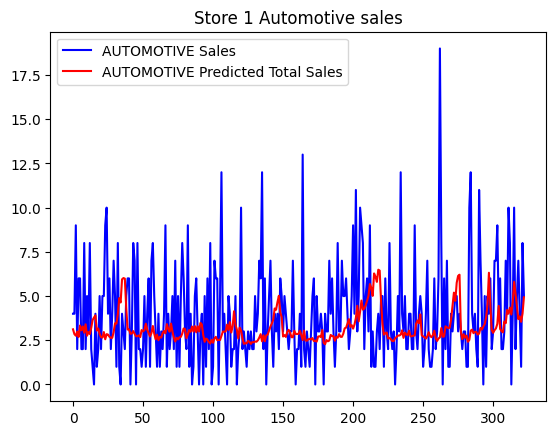

In [82]:
predict_column(1, 100, 8)

Epoch 1/100


2023-04-05 21:51:28.382082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:51:28.382997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:51:28.384094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 3s 7ms/step - loss: 0.0375 - val_loss: 0.0551


2023-04-05 21:51:30.947498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:51:30.948988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:51:30.950231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 9/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 10/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 11/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_l

150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 83/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 84/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 85/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 86/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 87/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 88/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 89/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 90/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 0.0551
Epoch 91/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0375 - val_loss: 

2023-04-05 21:52:33.423644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:52:33.424668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:52:33.426168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Evaluation loss: 0.0392669178545475


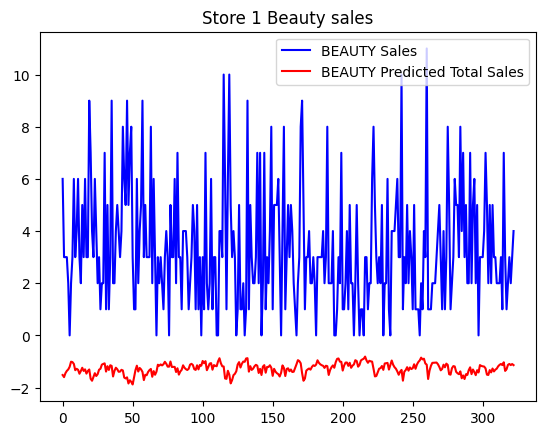

In [83]:
predict_column(3, 100, 8)

Epoch 1/100


2023-04-05 21:52:34.078999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:52:34.079922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:52:34.081079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

142/150 [===========================>..] - ETA: 0s - loss: 0.0068

2023-04-05 21:52:36.660254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:52:36.661587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:52:36.663076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 3s 7ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0060
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0063
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 9/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 10/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0061
E

150/150 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 82/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 83/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 84/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 85/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 86/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 87/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 88/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 89/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 90/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 

2023-04-05 21:53:38.241382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:53:38.242442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:53:38.243779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Evaluation loss: 0.002995325019583106


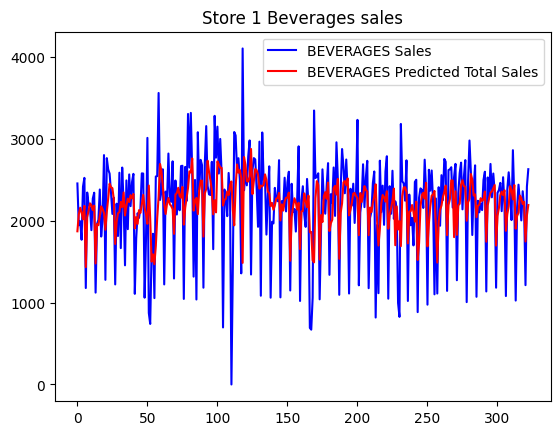

In [84]:
predict_column(4, 100, 8)

Epoch 1/100


2023-04-05 21:53:38.915286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:53:38.916377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:53:38.917493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 3s 7ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/100


2023-04-05 21:53:41.480600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:53:41.481952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:53:41.483117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100
150/150 [========

150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 78/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 80/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 82/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 84/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100
150/150 [=

2023-04-05 21:54:43.377909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 21:54:43.379074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 21:54:43.380141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Evaluation loss: 0.0


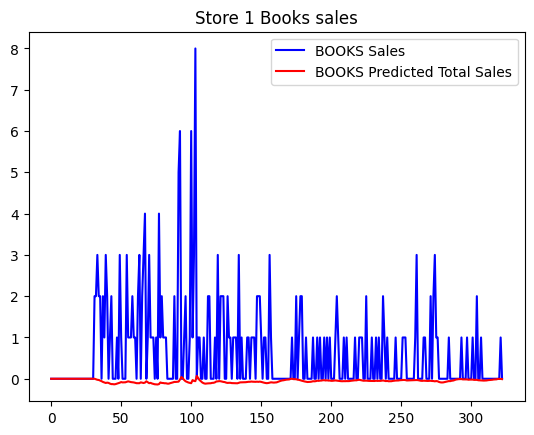

In [85]:
predict_column(5, 100, 8)